In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(central-limit-theorem)=
# The Central Limit Theorem

The central limit theorem (or CLT) can help us quantify the epistemic uncertainty in our Monte Carlo estimates.
It states that the sum of a large number of independent random variables will be approximately normally distributed.
And it tells us how the variance of the sum depends on the variance of the individual random variables.

Consider, $X_1,X_2,\dots$ be iid random variables with mean $\mu$ and variance $\sigma^2$.
Define their average:

$$
S_N = \frac{X_1+\dots+X_N}{N}.
$$

The CLT states that:

$$
S_N \sim N(S_N|\mu, \frac{\sigma^2}{N}),
$$

for large $N$.
That is, they start to look like Gaussian.

## Example: Sum of Exponentials
Let's test it for the Exponential distribution.
We will use ``numpy.random.exponential`` to sample from the exponential.
Here $X_i \sim \operatorname{Exp}(r)$, for some fixed $r$, are independent.
Let's take their average $S_N$ and see how it is distributed.

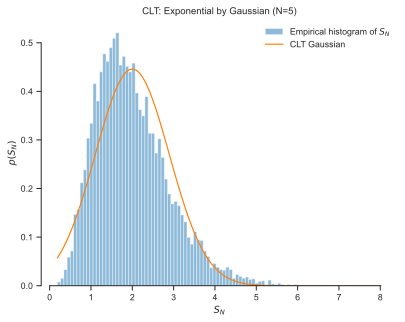

In [5]:
import scipy.stats as st

r = 0.5
N = 5   # How many iid variables are we going to sum
M = 10000 # How many times do you want to sample
# The random variable to sample from
X = st.expon(scale=1.0 / r)  # THIS IS THE ONLY LINE YOU NEED TO CHANGE TO TRY OUT DIFFERENT RVs
# The mean of the random variable
mu = X.expect()
# The variance of the random variable
sigma2 = X.var()
# The CLT standard deivation:
sigma_CLT = np.sqrt(sigma2 / N)

# Sample from X, N x M times.
x_samples = X.rvs(size=(N, M))
# Think of each column of x_samples as a sample from X1, X2, ..., XN.
# Take the average of each column:
SN = np.mean(x_samples, axis=0)

# Now you have M samples of SN
# Let's do their histogram
fig, ax = plt.subplots()
ax.hist(
    SN,
    bins=100,
    density=True,
    alpha=0.5,
    label='Empirical histogram of $S_N$'
)
# Let's depict in the same plot the PDF of the CLT Gaussian:
Ss = np.linspace(SN.min(), SN.max(), 100)
ax.plot(
    Ss,
    st.norm(
        loc=mu,
        scale=sigma_CLT
    ).pdf(Ss),
    label='CLT Gaussian'
)
ax.set_xlabel('$S_N$')
ax.set_ylabel('$p(S_N)$')
ax.set_title(f'CLT: Exponential by Gaussian (N={N})')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions
+ Start increasing $N$ and observe the convergence.
+ This holds for any random variable that satisfies the assumptions of the central limit theorem. Even discrete random variables! Modify the code above so that $X_i \sim \operatorname{Bernoulli}(\theta)$ for some $\theta$. You may use 